In [1]:
# Work with Data - the main Python libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Visualization
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, GridSearchCV

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Metrics
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter('ignore')

import math

/tmp/ipykernel_27840/2689528378.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
pd.set_option('max_colwidth', 200)

In [3]:
data = pd.read_csv('./kaggle_data/PB_All_2000_2021.csv', sep=';', header=0)
data

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [4]:
# Information for training data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [5]:
# Download data about monitoring stations
data_about = pd.read_csv('./kaggle_data/PB_stations.csv', sep=';', header=0, encoding='cp1251')
data_about.sort_values(by=['length'], ascending=False)

,id,length,name_station
20,21,773.0,"р. Південний Буг, 773 км, смт. Чорний Острів, Мар'янівське вдсх."
19,20,755.0,"р. Південний Буг, 755 км, м. Хмельницький , Хмельницьке вдсх."
18,19,744.0,"р. Південний Буг, 744 км, с. Копистин, нижче м.Хмельницький"
17,18,711.0,"р. Південний Буг, 711 км, смт. Меджибіж, Меджибіжське вдсх."
16,17,692.0,"р. Південний Буг, 692 км, с. Щедрове, Щедрівське вдсх."
15,16,652.0,"р. Південний Буг, 652 км, м. Хмільник, питний в/з, вище міста"
14,15,607.0,"р. Південний Буг, 607 км, с. Гущинці, нижче села , питний водозабір м.Калинівка"
13,14,582.0,"р. Південний Буг, 582 км, м. Вінниця, Сабарівське вдсх, питний в/з міста, вище міста"
12,13,569.5,"р. Південний Буг, 569,5 км, 500 м нижче скиду ВОКВП ВКГ ""Вінницяводоканал"" (1,5 км нижче греблі Сабарівського вдсх.)"
11,12,537.0,"р. Південний Буг, 537 км, смт. Сутиски, Сутиське вдсх., н/б'єф"


<AxesSubplot:>

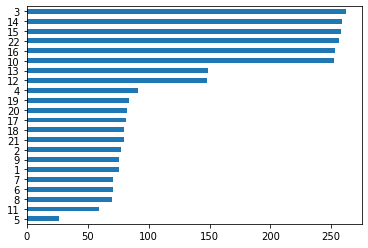

In [6]:
data['id'].value_counts().sort_values().plot(kind='barh')

In [7]:
data['ds'] = pd.to_datetime(data['date'])
data['year'] = data['ds'].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   object        
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
 11  ds         2861 non-null   datetime64[ns]
 12  year       2861 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 290.7+ KB


In [8]:
date_lim = pd.concat([data[['id', 'year']].groupby(by=['id']).min().sort_values(by=['year'], ascending=False), data[['id', 'year']].groupby(by=['id']).max().sort_values(by=['year'], ascending=False)], axis=1, join='outer')

In [9]:
date_lim

,year,year
id,,
5,2019,2021
13,2006,2018
1,2000,2018
21,2000,2018
20,2000,2018
19,2000,2018
18,2000,2018
17,2000,2018
16,2000,2021


In [10]:
last_entries = {}
for index, row in date_lim.iterrows():
    last_entries[index] = (row[1])
new_entries = {}
for index, row in date_lim.iterrows():
    new_entries[index] = (row[0])

In [11]:
new_entries

{5: 2019,
 13: 2006,
 1: 2000,
 21: 2000,
 20: 2000,
 19: 2000,
 18: 2000,
 17: 2000,
 16: 2000,
 15: 2000,
 14: 2000,
 12: 2000,
 2: 2000,
 11: 2000,
 10: 2000,
 9: 2000,
 8: 2000,
 7: 2000,
 6: 2000,
 4: 2000,
 3: 2000,
 22: 2000}

In [12]:
numerical_cols = data.select_dtypes(include=['int', 'float']).columns[1:-1]

normalized_data = data.copy()

normalized_data[numerical_cols] = (data[numerical_cols] - data[numerical_cols].min()) / (data[numerical_cols].max() - data[numerical_cols].min())

In [13]:
normalized_data

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,ds,year
0,1,17.02.2000,0.008370,0.054420,0.020168,0.136667,0.071214,0.000523,0.043096,0.032711,0.051552,2000-02-17,2000
1,1,11.05.2000,0.001116,0.058939,0.086723,0.162333,0.133058,0.000312,0.098506,0.006485,0.319127,2000-11-05,2000
2,1,11.09.2000,0.000812,0.041257,0.041176,0.109667,0.103448,0.001587,0.116416,0.014410,0.446815,2000-11-09,2000
3,1,13.12.2000,0.004312,0.043811,0.059832,0.137778,0.128411,0.000908,0.077013,0.027163,0.225097,2000-12-13,2000
4,1,02.03.2001,0.000000,0.059528,0.082017,0.163222,0.074963,0.000596,0.078804,0.009655,0.260358,2001-02-03,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.001167,0.052849,0.006050,0.092000,0.028486,0.000349,0.044775,0.052309,0.013860,2020-06-10,2020
2857,22,27.10.2020,0.000000,0.029862,0.000840,0.125111,0.004198,0.000284,0.041193,0.045681,0.012810,2020-10-27,2020
2858,22,03.12.2020,0.000862,0.005697,0.001345,0.123222,0.019340,0.000385,0.058745,0.034873,0.010890,2020-03-12,2020
2859,22,12.01.2021,0.000000,0.041257,0.000000,0.159000,0.029535,0.000312,0.034029,0.030550,0.011303,2021-12-01,2021


In [33]:
fields = list(normalized_data.columns[2:11])
dict2_data = {}

vec = {}
vec = [-1]*12
    
for index, row in normalized_data.iterrows():
    curr_id = int(row['id'])
    curr_year = int(row['year'])
    
    for k in fields:
        dict2_data[(curr_id, curr_year, k)] = vec 

In [34]:
dict2_data

{(1, 2000, 'NH4'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2000, 'BSK5'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2000, 'Suspended'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2000, 'O2'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2000, 'NO3'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2000, 'NO2'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2000, 'SO4'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2000, 'PO4'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2000, 'CL'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2001, 'NH4'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2001, 'BSK5'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2001, 'Suspended'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2001, 'O2'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2001, 'NO3'): [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 (1, 2001, 'NO2'): [-1,

In [35]:
for index, row in normalized_data.iterrows():
    curr_id = int(row['id'])
    curr_year = int(row['year'])
    curr_month = int(row['ds'].month)-1
    for k in fields[0:1]:
        dict2_data[(curr_id, curr_year,k)][curr_month] = row[k]
        if curr_id == 1 and curr_year == 2008:
            print(row[k])

0.0040581327516676395
0.00020290663758338196
0.0025363329697922743
0.0012935298145940598


In [36]:
dict2_data[(1, 2008, 'NH4')]

[0.0011413498364065235,
 0.005098029269282472,
 0.0008623532097293734,
 0.0026377862885839654,
 0.0,
 0.0011667131661044462,
 0.0012428031551982145,
 0.008293808811220738,
 0.0,
 0.0,
 0.0026377862885839654,
 0.0]

In [39]:
dict_data = dict2_data

In [40]:
len(dict_data)

3663

In [41]:
for key, value in dict_data.items():
    for element in value:
        if math.isnan(element):
            print(f"Found NaN in {key}!")

In [42]:
for index, row in normalized_data.iterrows():
    curr_id = row['id']
    curr_year = row['year']

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.optim.lr_scheduler as lscheduler

In [44]:
feature  = "NH4"
train_data  = []
test_data = []
for i,j,k in dict_data.keys():
    if feature == k:
        if j == last_entries[i] :
            test_data.append(dict_data[(i,j,k)])
        train_data.append(dict_data[(i,j,k)])

In [45]:
print(len(train_data))
print(len(test_data))

407
22


In [46]:
 class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        x = self.linear(lstm_out)
        return x

In [47]:
def yearly_data(data,feature, station):
    out = []
    k_f = feature
    i_f = station
    start_year = new_entries[i_f]
    end_year = last_entries[i_f]
    for i in range(start_year, end_year+1):
        if (i_f, i, k_f) in dict_data.keys():
            out= out + list(data[(i_f,i,k_f)])
    return out

In [48]:
model = AirModel().to('cuda')

In [49]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X).reshape(-1, lookback, 1), torch.tensor(y).reshape(-1, lookback, 1)

In [53]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
scheduler = lscheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

In [54]:
n_epochs = 100
test_loss = []
train_loss = []
look= 12
btch=2
for epoch in range(n_epochs):
    avg_loss = 0
    vavg_loss = 0
    for station_id in list(set(normalized_data['id'])):
        
        data_seq_nh4 = (dict_data, 'O2', station_id)

        train_nh4 = data_seq_nh4[:180]
        test_nh4 = data_seq_nh4[180:]
        
        trainX, trainY = create_dataset(train_nh4, look)
        testX, testY = create_dataset(train_nh4, look)
        
        loader = data.DataLoader(data.TensorDataset(trainX, trainY), shuffle=True, batch_size=btch)
        valloader = data.DataLoader(data.TensorDataset(testX, testY), shuffle=True, batch_size=btch)
        
        model.train()
  
        for X_batch, y_batch in loader:
            y_pred = model(X_batch.to('cuda'))
            loss = loss_fn(y_pred, y_batch.to('cuda'))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            avg_loss += loss.sum().item()
            
        for X_batch, y_batch in valloader:
            with torch.no_grad():
                y_pred = model(X_batch.to('cuda'))
                loss = loss_fn(y_pred, y_batch.to('cuda'))
                vavg_loss += loss.sum().item()

    if epoch % 1 != 0:
        continue
    scheduler.step(avg_loss)
    train_loss.append(avg_loss)
    test_loss.append(vavg_loss)

    print("Epoch %d: avg loss: %.6f , test: %0.6f" % (epoch, avg_loss, vavg_loss))

ValueError: num_samples should be a positive integer value, but got num_samples=0

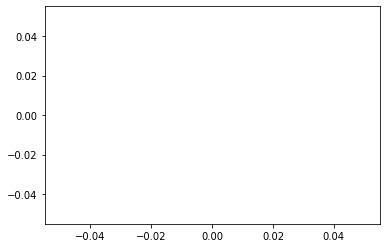

In [55]:
plt.plot(train_loss[20:], '-bo')

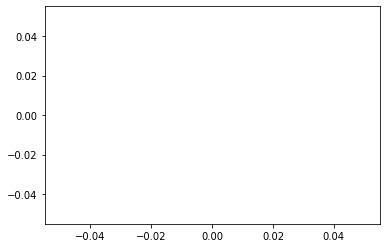

In [56]:
plt.plot(test_loss[20:], '-bo')

TypeError: float() argument must be a string or a number, not 'dict'

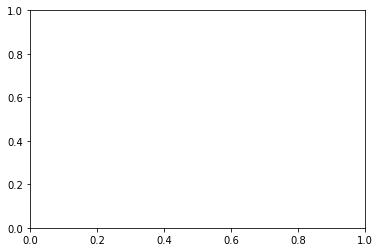

In [57]:
len(test_nh4)

plt.plot(data_seq_nh4)

In [31]:
test_nh4[:12]

NameError: name 'test_nh4' is not defined

In [24]:
test_nh4[12:24]

NameError: name 'test_nh4' is not defined

In [ ]:
model = model.to('cpu')

In [ ]:
test_nh4_to_model = torch.Tensor(test_nh4[:12]).reshape(-1, 1)

In [ ]:
test_nh4_to_model.shape

In [ ]:
with torch.no_grad():
    plt.figure(figsize=[12, 12])
    plt.plot(test_nh4[:12])
    plt.plot(model(test_nh4_to_model))